In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../../src/")

import nanonets_utils

In [2]:
N_voltages      = 80000
voltages        = np.zeros(shape=(N_voltages,9))
i1              = np.tile([0.0,0.1,0.0,0.1], int(N_voltages/4))
i2              = np.tile([0.0,0.0,0.1,0.1], int(N_voltages/4))
v_rand          = np.repeat(np.random.uniform(low=-0.05, high=0.05, size=((int(N_voltages/4),5))), 4, axis=0)
voltages[:,0]   = i1
voltages[:,1]   = i2
voltages[:,2:7] = v_rand

In [6]:
N_processes     = 10
index           = [i for i in range(N_voltages)]
rows            = [index[i::N_processes] for i in range(N_processes)]

In [11]:
voltages[rows[0]].shape

(8000, 9)

In [56]:
df1, df2 = nanonets_utils.get_boolean_data("/mnt/c/Users/jonas/Desktop/phd/data/system_size_scale/", N=10, N_e=8, on_state=[0.0123])

In [57]:
gates   = ['P','Q','AND','OR','PnotQ','XOR','notPQ','NAND','notQ','notP','NOR','notPandQ','PandnotQ','XNOR']
gates2  = [f'{gate} Fitness' for gate in gates]
markers = ['s','o','^','v','<','>','D','p','8','s','o','^','v','<','>','D','p','8']
labels  = ['$P$','$Q$','$PQ$','$P+Q$','$P\\bar{Q}$','$\\bar{P}Q+P\\bar{Q}$','$\\bar{P}Q$','$\\bar{P}+\\bar{Q}$','$\\bar{Q}$','$\\bar{P}$','$\\bar{P}\\bar{Q}$','$\\bar{P}+Q$','$P+\\bar{Q}$','$PQ+\\bar{P}\\bar{Q}$']

In [62]:
dff = nanonets_utils.fitness(df=df1, N_controls=5, gates=gates, delta=0.1, on_state=0.0123)
dfa = nanonets_utils.abundance(df=dff, gates=gates2)

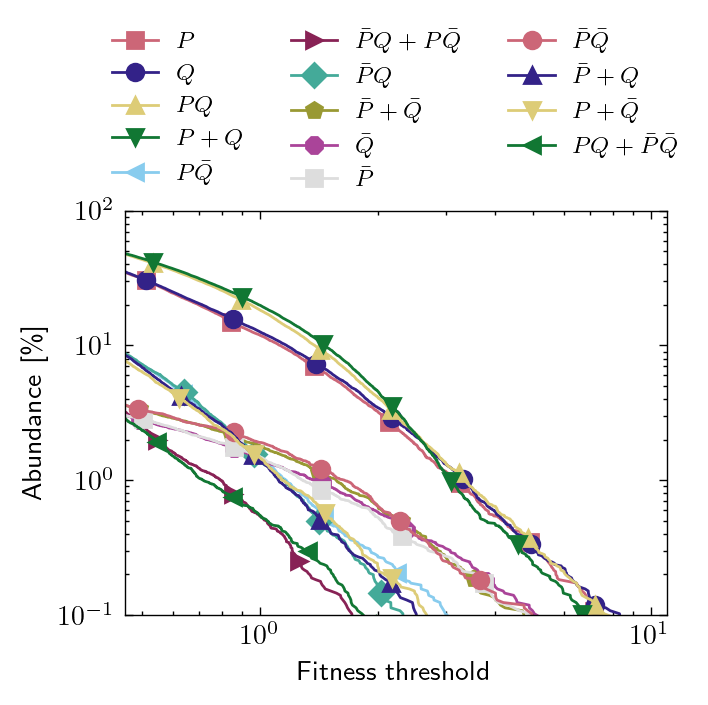

In [71]:
with plt.style.context(["science","muted"]):
    
    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for i, gate in enumerate(gates):

        ax = dfa.plot(x=f'{gate} Fitness', y=f'{gate} Fitness Abundance', ax=ax, label=gate, marker=markers[i], markevery=0.15)
    
    ax.set_xlabel('Fitness threshold')
    ax.set_ylabel('Abundance [\%]')
    ax.set_ylim(0.1,100)
    ax.set_xlim(0.45,11)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(labels, ncol=3, fontsize='small', loc='center', bbox_to_anchor=(0.5,1.25))
    fig.savefig("plots/sim_results.pdf", bbox_inches='tight')